# 👪 [Day 20](https://adventofcode.com/2019/day/20)

In [152]:
import heapq
from collections import defaultdict


def warp(portal):
    """Go from one portal to another"""
    if portal.lower() == portal:
        return portal.upper()
    elif portal.upper() == portal:
        return portal.lower()
    else:
        raise ValueError
        

def parse_maze(inputs):
    """Parse inputs to build the maze"""
    start = None
    maze = []
    portals = defaultdict(lambda: [])
    for r, line in enumerate(inputs):
        row = []
        for i, c in enumerate(line):
            if c == ' ' or c == '#':
                row.append(0)
            elif c == '.':
                row.append(1)
            else:
                # Vertical portal
                # Config: X   or .  
                #         X      X
                #         .      X
                if len(maze) and maze[-1][i] not in [0, 1]:
                    portal = maze[-1][i] + c
                    if r < len(inputs) - 1 and inputs[r + 1][i] == '.':
                        # portal level
                        if len(maze) >= 2 and maze[-2][i] == 0: 
                            portal = portal.lower()
                        # assign
                        maze[-1][i] = 0
                        row.append(portal)
                        portals[portal] = (r, i)
                    else:
                        # portal level
                        if r < len(inputs) - 1 and inputs[r + 1][i] == ' ':
                            portal = portal.lower()
                        # assign
                        maze[-1][i] = portal
                        row.append(0)
                        portals[portal] = (r - 1, i)
                # Horizontal portal
                elif len(row) and row[-1] not in [0, 1]:
                    portal = row[-1] + c
                    if i < len(line) - 1 and line[i + 1] == '.':
                        if len(row) >= 2 and row[-2] == 0:
                            portal = portal.lower()
                        row[-1] = 0
                        row.append(portal)
                        portals[portal] = (r, i)
                    else:
                        if i < len(line) - 1 and line[i + 1] == ' ':
                            portal = portal.lower()
                        row[-1] = portal
                        row.append(0)
                        portals[portal] = (r, i - 1)
                else:
                    row.append(c)
        maze.append(row)
    return maze, portals


def plot_maze(maze, figsize=None):
    """Plot maze"""
    from matplotlib import pyplot as plt
    portals = {}
    def portal_to_index(c):
        if c not in portals:
            portals[c] = 2 + len(portals)
        return portals[c]
    
    plt.figure(figsize=figsize)
    maze = [[portal_to_index(c) for c in row] for row in maze]
    plt.imshow(maze)
    plt.axis('off')
    plt.show()
    
    
def shortest_path(maze, portals):
    """Find shortest path"""
    start = portals['AA']
    queue = [(-1, start)] # -1 because of the way we parse the maze
    heapq.heapify(queue)
    dists = [[float('inf')] * len(maze[0]) for _ in range(len(maze))]
    while len(queue):
        d, (i, j) = heapq.heappop(queue)
        for x, y in [(i + 1, j), (i - 1, j), (i, j + 1), (i, j - 1)]:
            # paths not to take
            if maze[x][y] == 0 or maze[x][y] == 'AA':
                continue
            # ZZ portal
            elif maze[x][y] == 'ZZ':
                dists[x][y] = min(dists[x][y], d)
            # Simply advance
            elif maze[x][y] == 1:
                if d + 1 < dists[x][y]:
                    dists[x][y] = d + 1
                    heapq.heappush(queue, (d + 1, (x, y)))
            else:
                # not d + 1 because of the wat we parse the maze
                xx, yy = portals[warp(maze[x][y])]
                if d  < min(dists[x][y], dists[xx][yy]):
                    dists[x][y] = d 
                    dists[xx][yy] = d
                    heapq.heappush(queue, (d, (xx, yy)))
    x, y = portals['ZZ']
    return dists[x][y]


def shortest_path_with_recursion(maze, portals, recursion_limit=5):
    """Find shortest path"""
    start = portals['AA']
    queue = [(-1, 0, start)] # -1 because of the way we parse the maze
    heapq.heapify(queue)
    dists = {0: [[float('inf')] * len(maze[0]) for _ in range(len(maze))]}
    while len(queue):
        d, level, (i, j) = heapq.heappop(queue)
        if level >= recursion_limit:
            continue
        for x, y in [(i + 1, j), (i - 1, j), (i, j + 1), (i, j - 1)]:
            # ZZ end portal
            if maze[x][y] == 'ZZ' and level == 0:
                dists[level][x][y] = min(dists[level][x][y], d)
            # Cannot take outer portal at first level
            elif (maze[x][y] not in [0, 1] and 
                maze[x][y].upper() == maze[x][y] and 
                level == 0):
                continue
            # Walls
            elif maze[x][y] == 0 or maze[x][y] == 'AA' or (maze[x][y] == 'ZZ' and level != 0):
                continue
            # Simply advance
            elif maze[x][y] == 1:
                if d + 1 < dists[level][x][y]:
                    dists[level][x][y] = d + 1
                    heapq.heappush(queue, (d + 1, level, (x, y)))
            else:
                # not d + 1 because of the wat we parse the maze
                xx, yy = portals[warp(maze[x][y])]
                if maze[x][y] == maze[x][y].lower():
                    nxt_level = level + 1
                else:
                    nxt_level = level - 1
                if nxt_level not in dists:
                    dists[nxt_level] = [[float('inf')] * len(maze[0]) for _ in range(len(maze))]
                if d  < min(dists[level][x][y], dists[nxt_level][xx][yy]):
                    dists[level][x][y] = d 
                    dists[nxt_level][xx][yy] = d
                    heapq.heappush(queue, (d, nxt_level, (xx, yy)))
    x, y = portals['ZZ']
    return dists[0][x][y]

The shortest path from AA  to ZZ takes 714 steps

In a recursive maze, the shortest path from AA to ZZ now takes 7876 steps


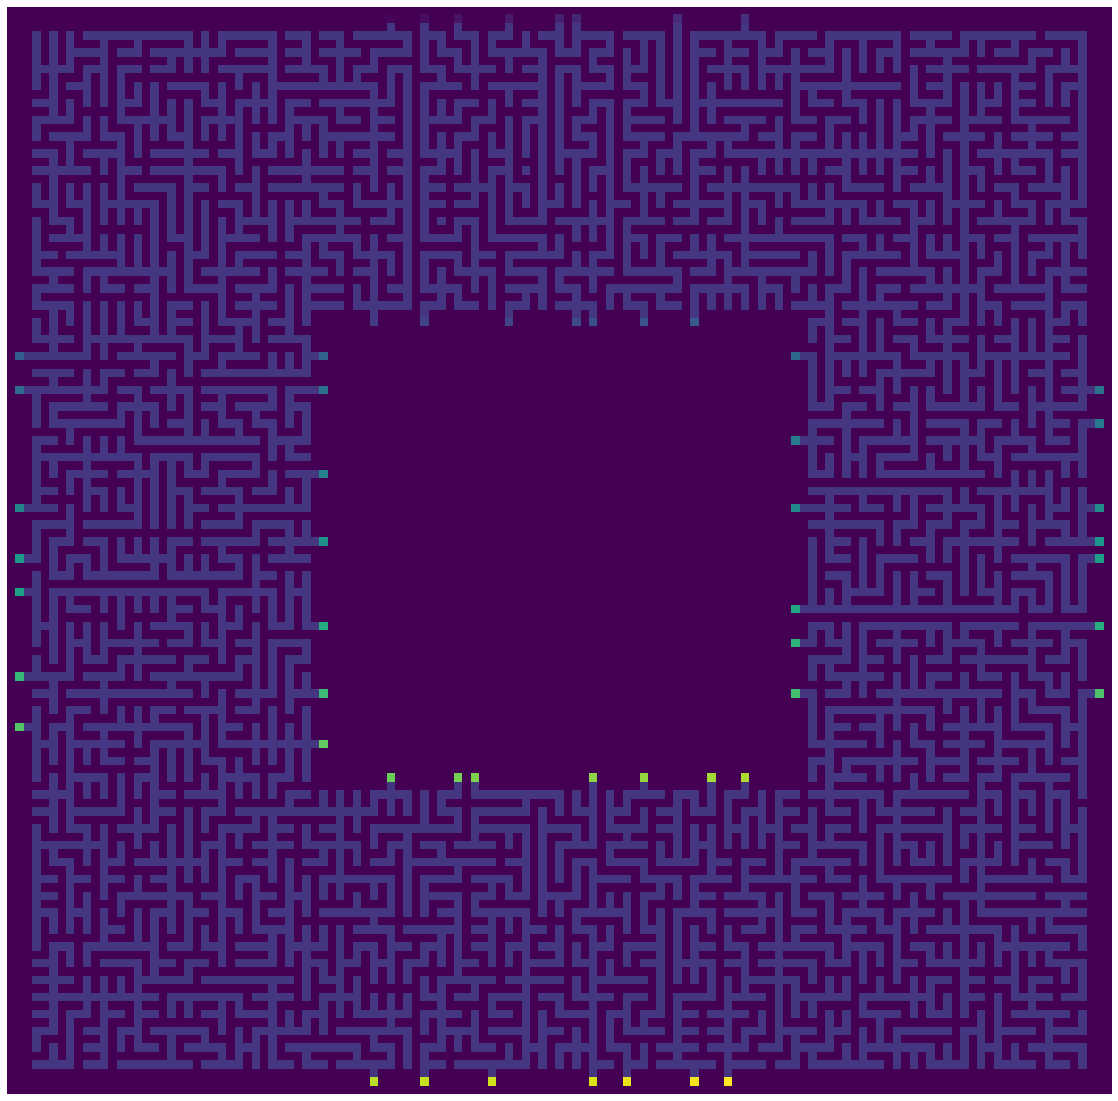

In [163]:
with open("inputs/day20.txt", 'r') as f:
    inputs = f.read().splitlines()
    
maze, portals = parse_maze(inputs)
print("The shortest path from AA  to ZZ takes {} steps".format(shortest_path(maze, portals)))
print("\nIn a recursive maze, the shortest path from AA to ZZ now takes {} steps".format(
    shortest_path_with_recursion(maze, portals, recursion_limit=40)))
plot_maze(maze, figsize=(20, 20))